<h2>What is K-Means Clustering-</h2>
    
__K-means clustering is a machine learning algorithm that groups data points into clusters based on their similarities__

__Steps of K-Means Clustering-__

1. Define K value
2. Divide dataset randomly into K clusters
3. Calculate centroid of each such cluster
4. Compute distance of each data point from all centroids
5. Check for minimum distance, if data point is near to other cluster's centroid, move the data point to that cluster
6. Recompute the centroids of updated clusters
7. Repeat [4, 5, 6] until the movement of data points stops

____
____
<img src="images\\KMeans_Clustering_Steps.png" alt="image" width="500px">


____
<img src="images\\KMeans_Clustering_Steps1.png" alt="image" width="500px">

# Sample Example

<img src="images\\KMeans_Clustering_Sample_Example.png" alt="image" width="500px">

<img src="images\\KMeans_Clustering_Sample_Example_Clusters.png" alt="image" width="500px">

<img src="images\\KMeans_Clustering_Sample_Example_Distances.png" alt="image" width="500px">

__The clusters are:__

__A -> 1,2__

__B -> 3,4,5__

<img src="images\\KMeans_Clustering_Sample_Example_Distances2.png" alt="image" width="500px">

# Another Example

<img src="images\\KMeans_Clustering_Sample_Example2.png" alt="image" width="500px" border="1px">

We took k as 2 for the above example, but it was random

Is there any way to specify the exact number of clusters?

<img src="images\\KMeans_Clustering_Selecting_K.png" alt="image" width="500px">

__Elbow graph is used to do so__. It's is a __plot against Within cluster sum of squares(WCSS) and number of clusters(k)__

And whenever this graph has drastic change, that value of k can be taken for modle building

__WCSS:   within a cluster, sum of squares of distances of all datapoints from the centroid__

# Example Code

In [222]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# We don't know the no. of clusters. So let's use K-Means and elbow method to choose this number of optimal clusters.
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

In [223]:
# Dealing with the same datasets used for Hierarchical clustering

df = pd.read_csv("Datasets\\Universities.csv")
df

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate
0,Brown,1310,89,22,13,22704,94
1,CalTech,1415,100,25,6,63575,81
2,CMU,1260,62,59,9,25026,72
3,Columbia,1310,76,24,12,31510,88
4,Cornell,1280,83,33,13,21864,90
5,Dartmouth,1340,89,23,10,32162,95
6,Duke,1315,90,30,12,31585,95
7,Georgetown,1255,74,24,12,20126,92
8,Harvard,1400,91,14,11,39525,97
9,JohnsHopkins,1305,75,44,7,58691,87


In [224]:
# As the units are not close to each other, we need to standardize it

from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

scaled_df = sc.fit_transform(df.iloc[:,1:])
scaled_df

array([[ 0.41028362,  0.6575195 , -0.88986682,  0.07026045, -0.33141256,
         0.82030265],
       [ 1.39925928,  1.23521235, -0.73465749, -1.68625071,  2.56038138,
        -0.64452351],
       [-0.06065717, -0.76045386,  1.02438157, -0.93346022, -0.16712136,
        -1.65863393],
       [ 0.41028362, -0.02520842, -0.78639393, -0.18066972,  0.29164871,
         0.14422904],
       [ 0.12771914,  0.34241431, -0.32076595,  0.07026045, -0.39084607,
         0.36958691],
       [ 0.69284809,  0.6575195 , -0.83813038, -0.68253005,  0.33778044,
         0.93298158],
       [ 0.4573777 ,  0.71003703, -0.47597528, -0.18066972,  0.29695528,
         0.93298158],
       [-0.10775125, -0.13024348, -0.78639393, -0.18066972, -0.51381683,
         0.59494478],
       [ 1.25797704,  0.76255456, -1.30375836, -0.43159988,  0.85874344,
         1.15833946],
       [ 0.36318954, -0.07772595,  0.24833493, -1.43532055,  2.21481798,
         0.0315501 ],
       [ 1.06960072,  0.92010716, -0.47597528, -0.

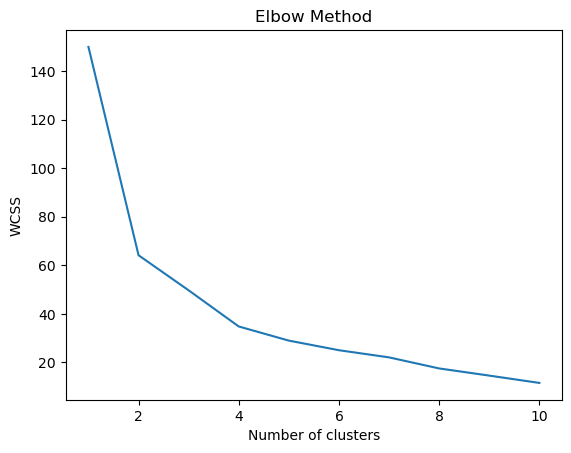

In [225]:
# Elbow method to get optimum value of K

wcss = [] # within cluster sum of square. Initialize WCSS and begin the loop
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,random_state=0) #max_iter=300 is default value.
    kmeans.fit(scaled_df) #  use fit method to fit the kmeans object to our scaled dataframe
    wcss.append(kmeans.inertia_)# another name for wcss is inertia.
    # In WCSS list we will append all distances i.e if cluster is 10 what is the value,

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [226]:
#init='k-means++': init is random initialization method. We can choose random if choice of initial centroid is to be random.
# But as we don't want to fall into random initialization, we are going to use this initialization method.
# ‘k-means++’ : selects initial cluster centroids using sampling, based on an empirical probability distribution of the points’.
# It makes several trials at each sampling step and selects the best centroid among them.
# Refer: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#:~:text=init%7B'k%2Dmeans%2B%2B,contribution%20to%20the%20overall%20inertia.
# max_iter=300: Suppose dataset has 200 data points. We will make 10 clusters of 20 points each in 1st iteration. Such how many combinations you can form for data points?
# so default value is 300. so we will keep it as it is.
# random_state=0: Use an int to make the randomness deterministic i.e. same results every time. It determines random number generation for centroid initialization.

In [227]:
wcss

[150.0,
 64.1452839501027,
 49.69054164653248,
 34.79612750585774,
 28.968669047324088,
 25.012005085561192,
 22.058835963741735,
 17.50346369017422,
 14.550294568354765,
 11.534641754172174]

In [228]:
# As the wcss has drastic change at k=2, we can go with 2. Btw its totally depdends on client requirement

In [229]:
# Taking n=3 for now

kmeans = KMeans(n_clusters=3,random_state=0)   # creating object
predict = kmeans.fit_predict(scaled_df)

In [230]:
predict

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1])

In [231]:
# the object created 'kmeans' also has attribute 'labels_', which gives same results. But how without knowing the data?
# Actually before fit_predict no such attribute exits, so this labes_ gets assigned to the object by fit_predict method
# And hence it gives correct prediction

kmeans.labels_            

array([1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1])

In [232]:
# Let's add prediction cloumn to df

df['Cluster']= predict
df.head()

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
0,Brown,1310,89,22,13,22704,94,1
1,CalTech,1415,100,25,6,63575,81,2
2,CMU,1260,62,59,9,25026,72,1
3,Columbia,1310,76,24,12,31510,88,1
4,Cornell,1280,83,33,13,21864,90,1


In [233]:
# Lets take mean of all numeric values with respect to each cluster

df.groupby('Cluster').mean('numeric_only')

,SAT,Top10,Accept,SFRatio,Expenses,GradRate
Cluster,,,,,,
0,1085.200000,44.000000,69.600000,18.600000,11056.400000,74.400000
1,1306.388889,84.277778,31.277778,11.777778,28175.111111,90.444444
2,1360.000000,87.500000,34.500000,6.500000,61133.000000,84.000000


In [234]:
# How many universities are there which are in cluster 3 and show few of those.

df[df['Cluster']==2]    

,Univ,SAT,Top10,Accept,SFRatio,Expenses,GradRate,Cluster
1,CalTech,1415,100,25,6,63575,81,2
9,JohnsHopkins,1305,75,44,7,58691,87,2


In [255]:
df[df['Cluster']==2].shape[0]   # 2 universities

2

# Ploting 3D plots (Extra and Unneccesary)


#### We have 6 independent colums but we can plot for 3 colmns at a time only

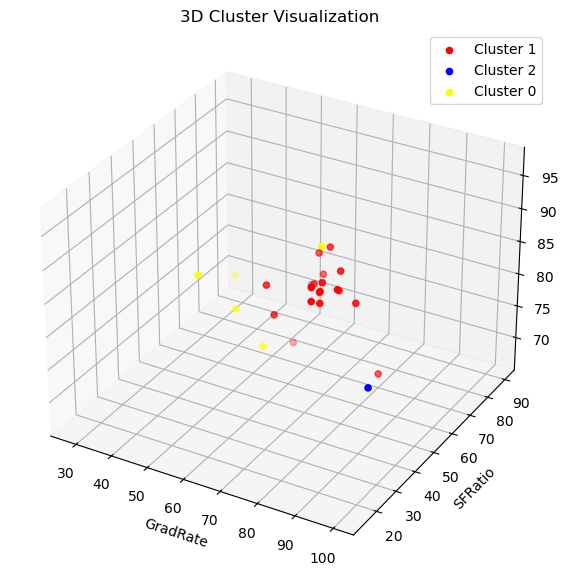

In [282]:
# Initialize the 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Plot each cluster
for cluster, color in zip(df['Cluster'].unique(),['red','blue','yellow']):
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['Top10'], cluster_data['Accept'], cluster_data['GradRate'],
               label=f'Cluster {cluster}', color=color)

# Add labels and title
ax.set_xlabel(x_col)
ax.set_ylabel(y_col)
ax.set_zlabel(z_col)
ax.set_title('3D Cluster Visualization')
ax.legend()
plt.show()


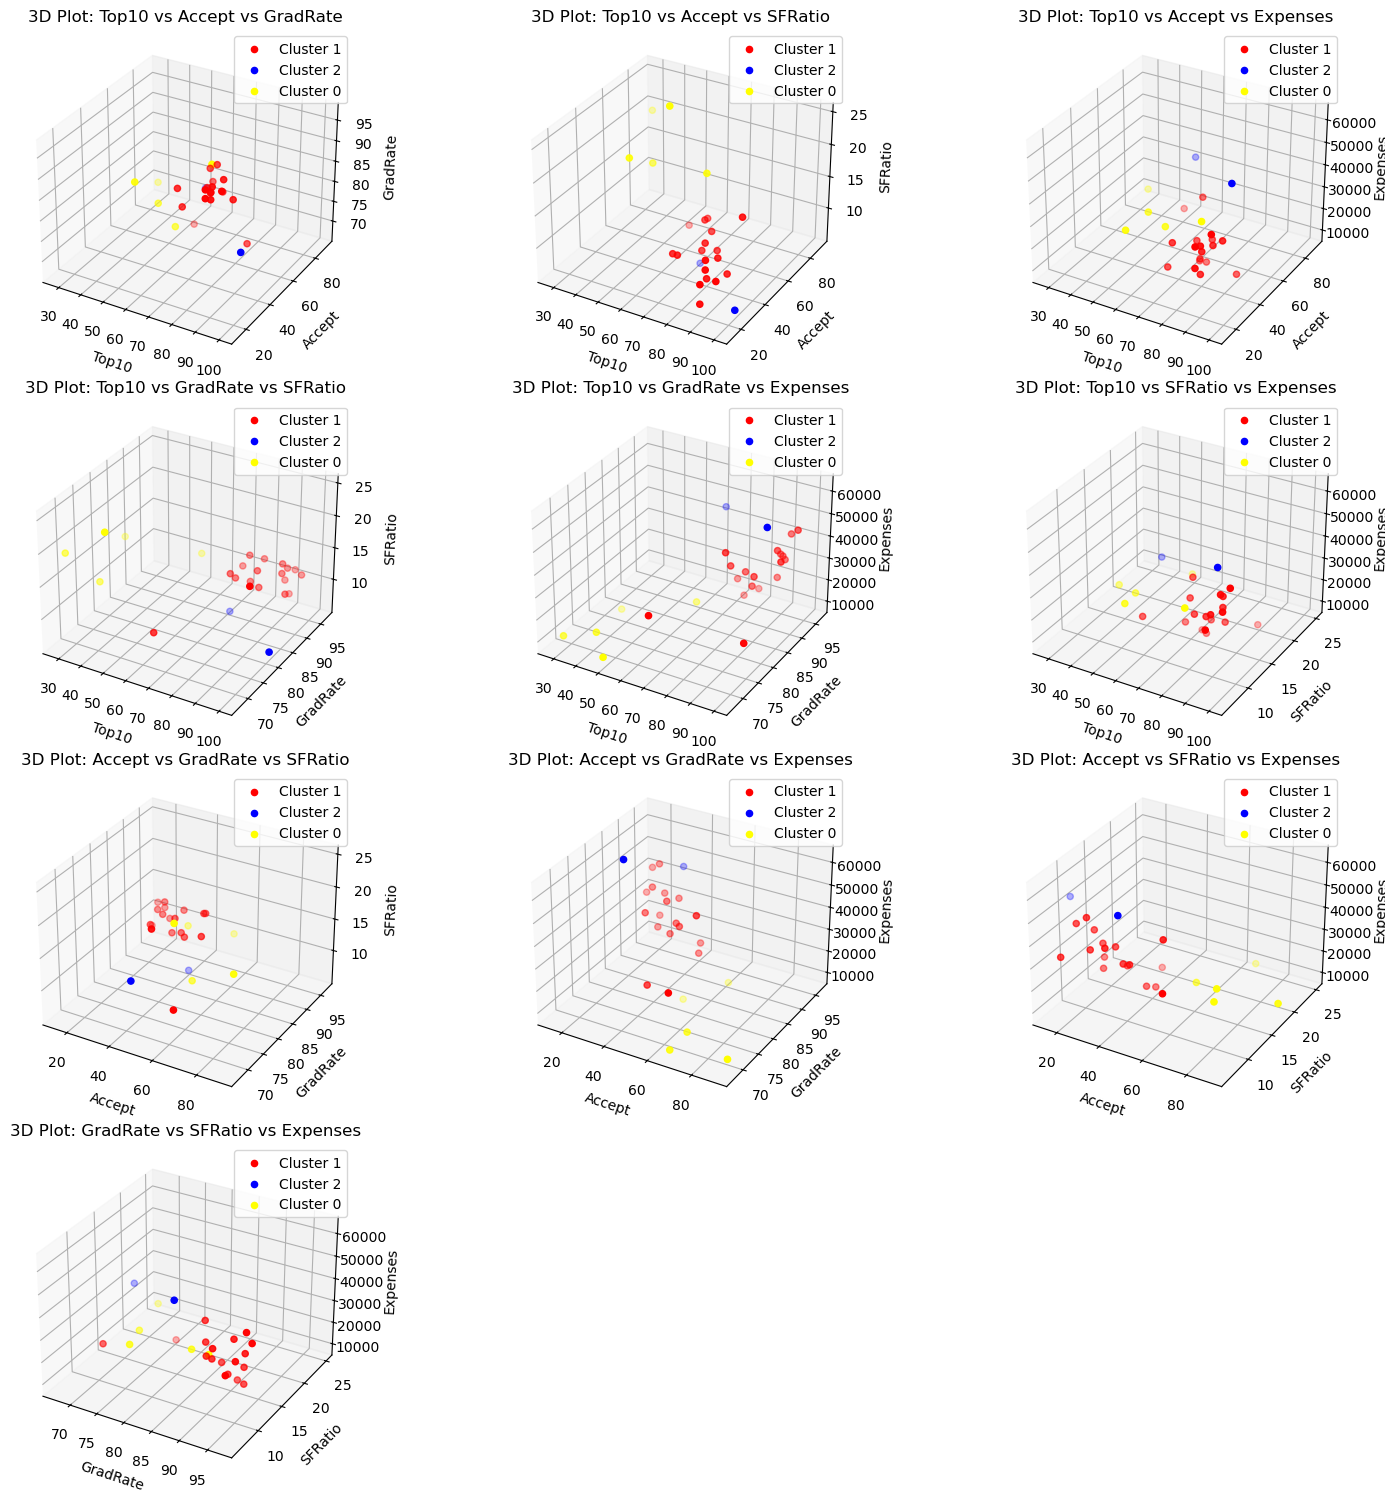

In [284]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import itertools

# List your columns
columns = ['Top10', 'Accept', 'GradRate', 'SFRatio', 'Expenses']

# Cluster column
cluster_col = 'Cluster'

# Initialize the plot
fig = plt.figure(figsize=(15, 15))

# Get unique clusters
clusters = df[cluster_col].unique()
colors = ['red', 'blue', 'yellow', 'green', 'purple']  # Adjust if you have more clusters

# Get all 3-column combinations from the 5 columns
combinations = list(itertools.combinations(columns, 3))

# Loop through each combination of 3 columns and create a 3D plot for each
for i, (x_col, y_col, z_col) in enumerate(combinations):
    ax = fig.add_subplot(4, 3, i + 1, projection='3d')  # Create a 4x3 grid to accommodate 10 subplots
    
    # Plot each cluster
    for cluster, color in zip(clusters, colors):
        cluster_data = df[df[cluster_col] == cluster]
        ax.scatter(cluster_data[x_col], cluster_data[y_col], cluster_data[z_col],
                   label=f'Cluster {cluster}', color=color)

    # Add labels and title
    ax.set_xlabel(x_col)
    ax.set_ylabel(y_col)
    ax.set_zlabel(z_col)
    ax.set_title(f'3D Plot: {x_col} vs {y_col} vs {z_col}')
    ax.legend()

# Show the plot
plt.tight_layout()
plt.show()
